In [1]:
import numpy as np
import pickle
from CentralPostprocessing import PairFractionData
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter
import os
plt.ion()

In [5]:
#import CentralPostprocessing
#os.system('python CentralPostprocessing.py')
#execfile('CentralPostprocessing')
#!python CentralPostprocessing.py
#exec(open("CentralPostprocessing.py").read())

In [1]:
'''for i in range(0,10):
    os.system('rm -r CentralPostprocessing/1.0_False_False_True_CE_Behroozi18_.pkl')
    !python CentralPostprocessing.py'''

"for i in range(0,10):\n    os.system('rm -r CentralPostprocessing/1.0_False_False_True_CE_Behroozi18_.pkl')\n    !python CentralPostprocessing.py"

In [2]:
file_name = '../Data/Observational/Behroozi_catalog/Berhoozi_SM_forFS.txt'
z_Beh = np.loadtxt(file_name, skiprows=3, usecols=0)
SM_Beh = np.loadtxt(file_name, skiprows=3, usecols=(1,2,3,4))

In [6]:
z = np.loadtxt('Plots/Redshift_array.txt')

#filename='CentralPostprocessing/1.0_False_False_True_CE_G19_SE_.pkl'
#filename='CentralPostprocessing/1.0_False_False_True_G19_DPL_Moster_.pkl'
filename='CentralPostprocessing/1.0_False_False_True_G19_DPL_G19_SE_.pkl'
x = pickle.load(open(filename, 'rb'))
Num=1000
AvaSM = []
for i in range(0, Num):
    #print('Running {}'.format(i+1))
    AvaStellarMass, AvaStellarMassBins = x.CreateAverageSM(ScatterOn=True,Scatter=0.15,Use_Alt=False)
    AvaSM.append(AvaStellarMass)
    #print('AvaStellarMass shape = {}'.format(np.shape(AvaStellarMass)))
AvaSM=np.array(AvaSM)
#print(AvaSM.shape)

"""#filename='CentralPostprocessing/1.0_False_False_True_CE_Behroozi18_.pkl'
filename='CentralPostprocessing/1.0_False_False_True_G19_DPL_Behroozi18_.pkl'
x_Beh = pickle.load(open(filename, 'rb'))
AvaSM_Beh = []
for i in range(0, Num):
    #print('Running {}'.format(i+1))
    AvaStellarMass_Beh, AvaStellarMassBins_Beh = x_Beh.CreateAverageSM(ScatterOn=True,Scatter=0.15,Use_Alt=True)
    AvaSM_Beh.append(AvaStellarMass_Beh)
    #print('AvaStellarMass shape = {}'.format(np.shape(AvaStellarMass)))
AvaSM_Beh=np.array(AvaSM_Beh)"""

"#filename='CentralPostprocessing/1.0_False_False_True_CE_Behroozi18_.pkl'\nfilename='CentralPostprocessing/1.0_False_False_True_G19_DPL_Behroozi18_.pkl'\nx_Beh = pickle.load(open(filename, 'rb'))\nAvaSM_Beh = []\nfor i in range(0, Num):\n    #print('Running {}'.format(i+1))\n    AvaStellarMass_Beh, AvaStellarMassBins_Beh = x_Beh.CreateAverageSM(ScatterOn=True,Scatter=0.15,Use_Alt=True)\n    AvaSM_Beh.append(AvaStellarMass_Beh)\n    #print('AvaStellarMass shape = {}'.format(np.shape(AvaStellarMass)))\nAvaSM_Beh=np.array(AvaSM_Beh)"

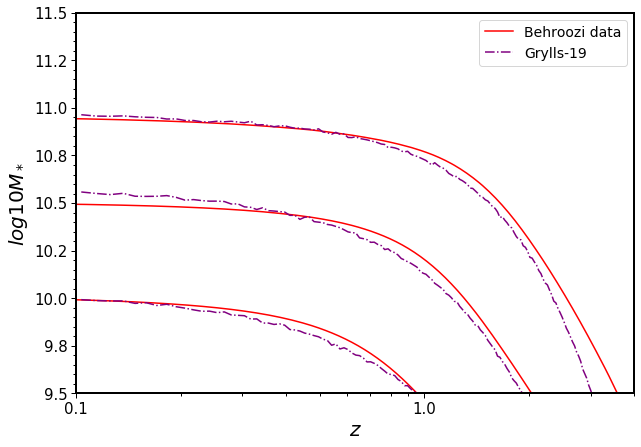

In [7]:
####Plot Moster parametrization
idx = [7,10,14]
AvaSM_mean=np.zeros((z.size,3))
AvaSM_median=np.zeros((z.size,3))
k=0
for i in idx:
    for j in range(0,z.size):
        #AvaSM_mean[j,k]=np.mean(AvaSM[:,j,i])
        AvaSM_median[j,k]=np.median(AvaSM[:,j,i])
    k+=1
plt.figure(figsize=(10,7))
for k in range(0,3):
    if k==0:
        plt.semilogx(z_Beh, SM_Beh[:,k], '-', color='red', label='Behroozi data')
        plt.semilogx(z, AvaSM_median[:,k], '-.', color='purple', label='Grylls-19')
    else:
        plt.semilogx(z_Beh, SM_Beh[:,k], '-', color='red')
        plt.semilogx(z, AvaSM_median[:,k], '-.', color='purple')
        #plt.semilogx(z, AvaSM_mean[:,k], ':')

"""AvaStellarMass, AvaStellarMassBins = x.CreateAverageSM(ScatterOn=False)
for i in idx:
    if i==idx[0]:
        plt.semilogx(z, AvaStellarMass[:,i], '-', color='blue', label='Scatter off (G19)')
    else:
        plt.semilogx(z, AvaStellarMass[:,i], '-', color='blue')"""
        
####Plot Behroozi parametrization
"""idx = [8,11,18]
AvaSM_mean=np.zeros((z.size,3))
AvaSM_median=np.zeros((z.size,3))
k=0
for i in idx:
    for j in range(0,z.size):
        #AvaSM_mean[j,k]=np.mean(AvaSM_Beh[:,j,i])
        AvaSM_median[j,k]=np.median(AvaSM_Beh[:,j,i])
    k+=1
for k in range(0,3):
    if k==0:
        plt.semilogx(z, AvaSM_median[:,k], '-.', color='black', label='Behroozi-19')
    else:
        plt.semilogx(z, AvaSM_median[:,k], '-.', color='black')
        #plt.semilogx(z, AvaSM_mean[:,k], ':')"""

"""AvaStellarMass_Beh, AvaStellarMassBins_Beh = x_Beh.CreateAverageSM(ScatterOn=False, Use_Alt=True)
for i in idx:
    if i==idx[0]:
        plt.semilogx(z, AvaStellarMass_Beh[:,i], ':', color='deepskyblue', label='Scatter off (Behr. parametrization)')
    else:
        plt.semilogx(z, AvaStellarMass_Beh[:,i], ':', color='deepskyblue')"""

####Plot G19
"""AvaStellarMass = np.loadtxt('Plots/SM_track_G19.txt')
idx = [7,10,15]
for i in idx:
    if (i==idx[0]):
        plt.semilogx(z, AvaStellarMass[:,i], '-.', color='black', label='G19')
    else:
        plt.semilogx(z, AvaStellarMass[:,i], '-.', color='black')"""
        
plt.xlim(0.1,4)
plt.ylim(9.5, 11.5)
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$log10 M_*$', fontsize=20)
plt.legend(fontsize=14)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)
#plt.savefig('CentralPostprocessing/SM_track.pdf', dpi=300)

#for i in range(0,AvaStellarMass[:,19].size-1):
#    if (AvaStellarMass[i+1,19]>AvaStellarMass[i,19]):
#        print(i)

In [10]:
#np.savetxt('SM_track_B19.txt', AvaSM_median, header= 'G19_DPL Behroozi18')

AvaStellarMass shape = (190, 57)


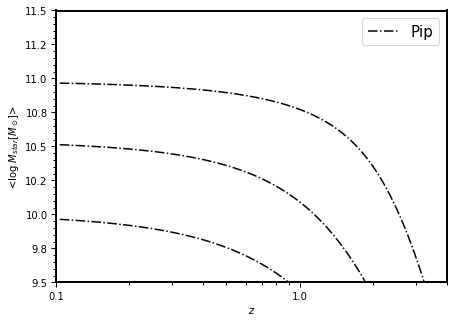

In [5]:
import numpy as np
import pickle
from CentralPostprocessing import PairFractionData
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter
import os
plt.ion()

z = np.loadtxt('Plots/Redshift_array.txt')

filename='CentralPostprocessing/1.0_False_False_True_CE_G19_SE_.pkl'
x = pickle.load(open(filename, 'rb'))
AvaStellarMass, AvaStellarMassBins = x.CreateAverageSM(ScatterOn=False,Scatter=0.2)
print('AvaStellarMass shape = {}'.format(np.shape(AvaStellarMass)))

np.savetxt('Plots/SM_track_G19.txt',AvaStellarMass)

plt.figure(figsize=(7,5))
idx = [7,10,15]
for i in idx:
    if (i==idx[0]):
        plt.semilogx(z, AvaStellarMass[:,i], '-.', color='black', label='Pip')
    else:
        plt.semilogx(z, AvaStellarMass[:,i], '-.', color='black')

plt.xlim(0.1,4)
plt.ylim(9.5, 11.5)
plt.xlabel(r'$z$')
plt.ylabel(r'<log $M_{star} [M_\odot]$>')
plt.legend(fontsize=15)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.savefig('CentralPostprocessing/Grylls19.png', dpi=300)